# Project Description

- The main goal of this project is to find out which of the plans (surf or ultimate) brings in more revenue in order to adjust the advertising budget accordingly.
- To determine this, we will analyze the data on 500 clients and their behavior.

## Step - Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import numpy as npy
import matplotlib.pyplot as plt  

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [2]:
def initial_stage(data):
    print(data.info())
    return (data).head()

In [3]:
initial_stage(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
#converting call_date to date format

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head()


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [5]:
initial_stage(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
#converting session_date to date format

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [7]:
initial_stage(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
#Converting message_date to date format

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [9]:
plans.rename(columns={'plan_name': 'plan'}, inplace=True)
initial_stage(plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
initial_stage(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
#Studying in missing values in churn_date

print(users[~users['churn_date'].isna()])

     user_id  first_name  last_name  age  \
6       1006      Jesusa   Bradford   73   
12      1012     Jonelle    Mcbride   59   
22      1022          Bo       Snow   73   
40      1040       Paris     Santos   72   
50      1050        Jone       Owen   23   
54      1054       Denis      Frost   50   
67      1067        Robt      Allen   37   
83      1083      Lyndia    Acevedo   65   
84      1084       Wiley   Mckinney   21   
94      1094      Walter   Petersen   54   
106     1106        Eddy   Garrison   47   
129     1129       Marin     Bolton   70   
172     1172      Weldon   Robinson   72   
180     1180       Wonda       Hays   24   
186     1186      Josiah    Douglas   55   
191     1191        Zack     Waters   75   
220     1220        Jack     Strong   26   
246     1246      Stevie      Moran   69   
269     1269      Irving   Thompson   39   
281     1281        Zack      Hardy   39   
296     1296      Weston     Conley   36   
298     1298       Loyce     Coo

## Step - Prepare the data

- Convert the data to the necessary types
- Find and eliminate errors in the data
- Explain what errors you found and how you removed them.
- For each user, find:
    - The number of calls made and minutes used per month
    - The number of text messages sent per month
    - The volume of data per month
    - The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [12]:
# The number of calls made and minutes used per month

# Rounding up individual calls
calls['duration'] = calls['duration'].apply(np.ceil)

number_of_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
number_of_calls.columns = ['user_id', 'month','calls_made', 'minutes_used']
number_of_calls['minutes_used'] = number_of_calls['minutes_used'].astype('int')


In [13]:
# The number of text messages sent per month

number_of_messages = messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
number_of_messages.columns = ['user_id', 'month','month_messages']
number_of_messages

,user_id,month,month_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [14]:
# The volume of data per month  

data_volume = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index() 
data_volume.columns = ['user_id', 'month','mb_volume']

# Rounding up the total for the month
data_volume['gb_volume'] = (data_volume['mb_volume']/1024).apply(np.ceil).astype('int')

data_volume

,user_id,month,mb_volume,gb_volume
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


In [15]:
users2 = users[['user_id', 'plan', 'city']]
users2.head()

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [16]:
#The monthly revenue from each user (subtract the free package limit from the total number of calls, 
#text messages, and data; multiply the result by the calling plan value; add the monthly charge depending 
#on the calling plan)


monthly_revenue = number_of_calls.merge(right = number_of_messages, on=['user_id','month'], how='outer')
monthly_revenue = monthly_revenue.merge(right=data_volume, on=['user_id','month'], how='outer')
monthly_revenue = users2.merge(right = monthly_revenue, on='user_id', how='outer' )


monthly_revenue = monthly_revenue.fillna(0)
monthly_revenue[['month', 'calls_made', 'minutes_used', 'month_messages', 'gb_volume']] = monthly_revenue[['month', 'calls_made', 'minutes_used', 'month_messages', 'gb_volume']].astype('int')
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2303 non-null   int64  
 1   plan            2303 non-null   object 
 2   city            2303 non-null   object 
 3   month           2303 non-null   int64  
 4   calls_made      2303 non-null   int64  
 5   minutes_used    2303 non-null   int64  
 6   month_messages  2303 non-null   int64  
 7   mb_volume       2303 non-null   float64
 8   gb_volume       2303 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 179.9+ KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer' can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

In [17]:
# Creating dictionaries for the plans restrictions

surf_dict = {'messages_included': 50,
 'mb_per_month_included': 15360,
 'minutes_included': 500,
 'usd_monthly_pay': 20,
 'usd_per_gb': 10,
 'usd_per_message': 0.03,
 'usd_per_minute': 0.03}


ultimate_dict = {'messages_included': 1000,
 'mb_per_month_included': 30720,
 'minutes_included': 3000,
 'usd_monthly_pay': 70,
 'usd_per_gb': 7,
 'usd_per_message': 0.01,
 'usd_per_minute': 0.01}


In [18]:
def monthly_charge(row):
    
    minutes = row['minutes_used']
    messages = row['month_messages']
    data = row['gb_volume']
    plan = row['plan']

    if plan == 'surf':
        charge = surf_dict['usd_monthly_pay']
        if minutes <= surf_dict['minutes_included']:
            minutes_extra_charge = 0
        else:
            minutes_extra_charge =  (minutes - surf_dict['minutes_included']) * surf_dict['usd_per_minute']
        if messages <= surf_dict['messages_included']:
            messages_extra_charge = 0
        else:
            messages_extra_charge = (messages - surf_dict['messages_included']) * surf_dict['usd_per_message']
        if data <= (surf_dict['mb_per_month_included']/1024):
            data_extra_charge = 0
        else:
            data_extra_charge = (data - (surf_dict['mb_per_month_included']/1024)) * surf_dict['usd_per_gb']
        total_charge =  charge + minutes_extra_charge + messages_extra_charge + data_extra_charge
        return total_charge
    
    elif plan == 'ultimate':
        charge = ultimate_dict['usd_monthly_pay']
        if minutes <= (ultimate_dict['minutes_included']):
            minutes_extra_charge = 0
        else:
            minutes_extra_charge =  (minutes - ultimate_dict['minutes_included']) * ultimate_dict['usd_per_minute']
        if messages <= (ultimate_dict['messages_included']):
            messages_extra_charge = 0
        else:
            messages_extra_charge = ((messages - ultimate_dict['messages_included']) * ultimate_dict['usd_per_message'])
        if data <= (ultimate_dict['mb_per_month_included']/1024):
            data_extra_charge = 0
        else:
            data_extra_charge = (data - (ultimate_dict['mb_per_month_included']/1024)) * ultimate_dict['usd_per_gb']
        total_charge =  charge + minutes_extra_charge + messages_extra_charge + data_extra_charge
        return total_charge
        

monthly_revenue['revenue'] = monthly_revenue.apply(monthly_charge, axis=1)

In [19]:
monthly_revenue

,user_id,plan,city,month,calls_made,minutes_used,month_messages,mb_volume,gb_volume,revenue
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12,16,124,11,1901.47,2,70.00
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",8,27,182,30,6919.15,7,20.00
2,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",9,49,315,44,13314.82,14,20.00
3,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,65,393,53,22330.49,22,90.09
4,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,64,426,36,18504.30,19,60.00
...,...,...,...,...,...,...,...,...,...,...
2298,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",12,39,339,0,23137.69,23,100.00
2299,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",9,41,346,0,12984.76,13,20.00
2300,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",10,53,385,0,19492.43,20,70.00
2301,1499,surf,"Orlando-Kissimmee-Sanford, FL MSA",11,45,308,0,16813.83,17,40.00


## Step - Analyze the data

- Describe the customers' behavior. 
- Find the minutes, texts, and volume of data the users of each plan require per month. 
- Calculate the mean, variance, and standard deviation. 
- Plot histograms. 
- Describe the distributions.

In [20]:
#Find the minutes, texts, and volume of data the users of each plan require per month (surf)

monthly_revenue_surf = monthly_revenue[monthly_revenue['plan']=='surf']
monthly_revenue_surf.pivot_table(index=['month'], values=['minutes_used','month_messages', 'gb_volume', 'revenue'], aggfunc='sum', margins=True).reset_index()


,month,gb_volume,minutes_used,month_messages,revenue
0,0,0,0,0,120.00
1,1,10,406,21,40.00
2,2,110,2673,108,309.57
3,3,312,7590,351,1056.65
4,4,611,17577,870,2035.53
5,5,1087,30768,1849,3667.37
6,6,1502,41836,2454,4779.80
7,7,2042,54448,3271,7583.56
8,8,2735,66438,4662,10356.85
9,9,3238,80360,5968,11304.67


In [21]:
#Find the minutes, texts, and volume of data the users of each plan require per month (ultimate)

monthly_revenue_ultimate = monthly_revenue[monthly_revenue['plan']=='ultimate']
monthly_revenue_ultimate.pivot_table(index=['month'], values=['minutes_used','month_messages', 'gb_volume', 'revenue'], aggfunc='sum', margins=True).reset_index()


,month,gb_volume,minutes_used,month_messages,revenue
0,0,0,0,0,280.0
1,1,29,774,62,280.0
2,2,121,2822,151,490.0
3,3,221,3651,243,896.0
4,4,343,7074,463,1533.0
5,5,489,11781,931,2051.0
6,6,725,17435,1379,3367.0
7,7,973,25197,1937,4242.0
8,8,1267,29922,2732,5173.0
9,9,1463,37626,3259,6195.0


In [22]:
# Number of unique users per plan

print(len(monthly_revenue_surf['user_id'].unique()))
print(len(monthly_revenue_ultimate['user_id'].unique()))
print()

# Year revenue per plan

print(monthly_revenue[monthly_revenue['plan'] =='surf']['revenue'].sum())
print(monthly_revenue[monthly_revenue['plan'] =='ultimate']['revenue'].sum())
print()
# Average yearly revenue per user
print(monthly_revenue[monthly_revenue['plan'] =='surf']['revenue'].sum()/len(monthly_revenue_surf['user_id'].unique()))
print(monthly_revenue[monthly_revenue['plan'] =='ultimate']['revenue'].sum()/len(monthly_revenue_ultimate['user_id'].unique()))


339
161

95611.18
52346.0

282.03887905604716
325.1304347826087


#### Customer's behavior

- There are almost double the amount of surf clients than there are ultimate clients
- Surf clients bring in more revenue in total
- Ultimate clients bring in more revenue on average

In [23]:
# Calculate the mean, variance, and standard deviation.

def measures_of_location(data, column, title):
    print('Statistical info of {}:'.format(column))
    print()
    print(data[column].describe())
    print()
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    print("Outliers min border:", min_IQR, 'max border:', max_IQR)
    print()
    print('Histogram:')
    data[column].hist(bins=100)
    plt.xlabel(column)
    plt.ylabel('users')
    plt.title(title)
    return plt.show

Statistical info of minutes_used:

count    1579.000000
mean      427.120329
std       235.490079
min         0.000000
25%       269.000000
50%       424.000000
75%       576.000000
max      1510.000000
Name: minutes_used, dtype: float64

Outliers min border: -191.5 max border: 1036.5

Histogram:


<function matplotlib.pyplot.show(close=None, block=None)>

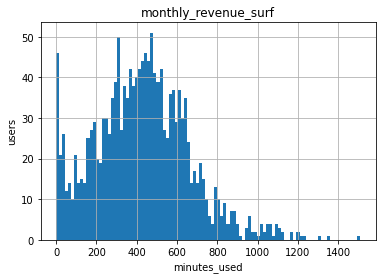

In [24]:
measures_of_location(monthly_revenue_surf, 'minutes_used', 'monthly_revenue_surf')

- The distribution of **minutes_used** for **surf** clients is normal-ish.
- The mean of the population uses 427 minutes per month, and anything above 1036 can be considered an outlier.
- A bit more than 25% of the population is **exceeding their monthly limit of 500 minutes per month**

Statistical info of minutes_used:

count     724.000000
mean      428.071823
std       241.958423
min         0.000000
25%       258.750000
50%       421.500000
75%       564.250000
max      1369.000000
Name: minutes_used, dtype: float64

Outliers min border: -199.5 max border: 1022.5

Histogram:


<function matplotlib.pyplot.show(close=None, block=None)>

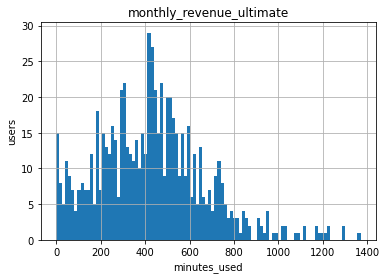

In [25]:
measures_of_location(monthly_revenue_ultimate, 'minutes_used', 'monthly_revenue_ultimate')

- The distribution of **minutes_used** for **ultimate** clients is also similar to a normal distribution.
- The mean is at 428 minutes per year, and most of the clients (75%) use 564 minutes or less than this.
- Anything above 1022 can be considered an outlier.

Statistical info of month_messages:

count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: month_messages, dtype: float64

Outliers min border: -63.0 max border: 113.0

Histogram:


<function matplotlib.pyplot.show(close=None, block=None)>

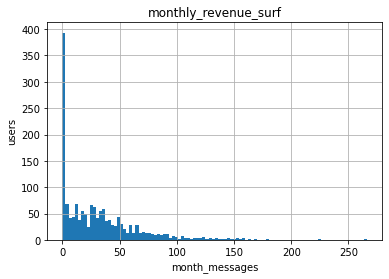

In [26]:
measures_of_location(monthly_revenue_surf, 'month_messages', 'monthly_revenue_surf')

- The distribution of **messages sent** for **surf** clients is  skewed to the right.
- A considerably large amount of clients does not send any messages.
- The mean of the population sends 31 messages per month, and anything over 113 messages per month is considered an outlier.

Statistical info of month_messages:

count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: month_messages, dtype: float64

Outliers min border: -75.375 max border: 141.625

Histogram:


<function matplotlib.pyplot.show(close=None, block=None)>

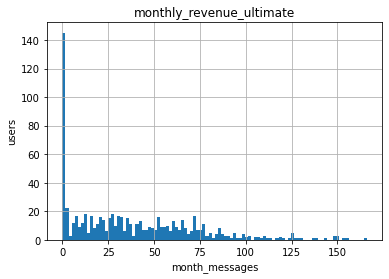

In [27]:
measures_of_location(monthly_revenue_ultimate, 'month_messages', 'monthly_revenue_ultimate')

- The distribution of **messages sent** for **ultimate** clients is  also skewed to the right.
- The peak of the graph is at 0, meaning that the largest portion of the population sends 0 messages each month.
- Anything above 141 messages can be considered an outlier.

Statistical info of gb_volume:

count    1579.000000
mean       16.607346
std         7.899502
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_volume, dtype: float64

Outliers min border: -1.5 max border: 34.5

Histogram:


<function matplotlib.pyplot.show(close=None, block=None)>

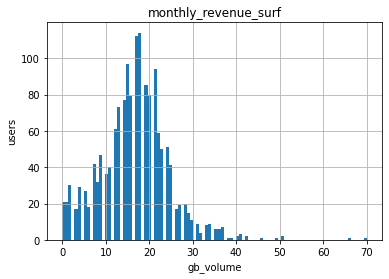

In [28]:
measures_of_location(monthly_revenue_surf, 'gb_volume', 'monthly_revenue_surf')

- The distribution of **gb volume** for **surf** clients is similar to a normal distribution.
- The mean of the population uses 16 gb per month, and 50% uses more than 17 gb, **which means that more than 50% of the population is exceeding the monthly limit of data for their plan**
- Anything above 34 gb can be considered an outlier.

Statistical info of gb_volume:

count    724.000000
mean      17.211326
std        7.755841
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_volume, dtype: float64

Outliers min border: 1.0 max border: 33.0

Histogram:


<function matplotlib.pyplot.show(close=None, block=None)>

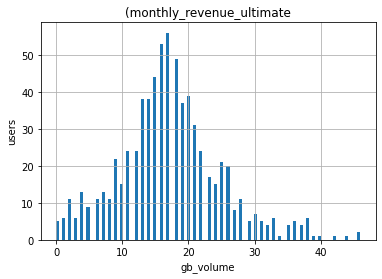

In [29]:
measures_of_location(monthly_revenue_ultimate, 'gb_volume', '(monthly_revenue_ultimate')

- The distribution of **gb volume** for **ultimate** clients is similar to a normal distribution.
- The mean of the population uses 17 gb per month, and just a very small percentage of users exceeds their monthly limit of 30 gb.
- Anything over 33 gb is an outlier.

## Step - Test the hypotheses

- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NY-NJ area is different from that of the users from other regions.

You decide what alpha value to use. Explain:
- How you formulated the null and alternative hypotheses.
- What criterion you used to test the hypotheses and why.


 #### Hypotheses:
  - H0: The average revenue from users of Ultimate and Surf calling is the same.
  - H1: The average revenue from users of Ultimate and Surf calling plans differs.

In [30]:
# Checking whether the populations' variance is the same or not

print(monthly_revenue_surf['revenue'].var())
print(monthly_revenue_ultimate['revenue'].var())
print()

# Since the difference in populations' variance is larger than 5%, we set equal_var = False

from scipy import stats as st

sample_s = monthly_revenue_surf['revenue'].sample(n=80, random_state=42)
sample_u = monthly_revenue_ultimate['revenue'].sample(n=80, random_state=42)


alpha = 0.05

results = st.ttest_ind(sample_s, sample_u, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


3062.4468636121596
129.1595561770707

p-value:  0.01825509842866833
We reject the null hypothesis


**There is a significant difference between the average of revenue between surf and ultimate.**
- The mean revenue from surf and ultimate clients is not the same, as noted above, ultimate clients bring in more revenue on average.


#### Hypotheses:
  - H0: The average revenue from users in NY-NJ area and users from other regions is the same.
  - H1: The average revenue from users in NY-NJ area and users from other regions is different.

In [31]:


ny_nj = monthly_revenue.loc[monthly_revenue['city'].str.contains('NY|NJ')]
no_ny_nj = monthly_revenue.loc[~monthly_revenue['city'].str.contains('NY|NJ')]

# Checking whether the populations' variance is the same or not

np.var(ny_nj['revenue'])
np.var(no_ny_nj['revenue'])
print('Difference in variance between populations:',(np.var(no_ny_nj['revenue']) - np.var(ny_nj['revenue']))/np.var(no_ny_nj['revenue']))
print()
# Since the difference between populations' variance is less than 5%, will consider them equal

sample_ny_nj = ny_nj['revenue'].sample(n=100, random_state=42)
sample_no_ny_nj = no_ny_nj['revenue'].sample(n=100, random_state=42)


from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(sample_ny_nj, sample_no_ny_nj)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    

Difference in variance between populations: 0.037631169363707424

p-value: 0.13252241975933446
We can't reject the null hypothesis


**There is no significant difference between the average revenue made from users in NY-NJ and that made from users in other areas.**

## Step - Write an overall conclusion

- There are almost double the amount of surf clients than there are ultimate clients
- Surf clients bring in more revenue in total
- Ultimate clients bring in more revenue on average

#### Surf clients are exceeding their monthly limits:
- A bit more than 25% of the population is **exceeding their monthly limit of 500 minutes per month**
- The mean of the population uses 16 gb per month, and 50% uses more than 17 gb, **which means that more than 50% of the population is exceeding the monthly limit of data for their plan**

#### Recommendations:
- Increase the charge for minutes and data that exceeds the monthly limit.
- Invest in more marketing for ultimate plan, since these clients bring in the most revenue.